In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/PhiPhuongUyen/Team-5/main/marketing_campaign.csv"
df= pd.read_csv(url, sep="\t")
pysqldf = lambda q: sqldf(q, globals())

In [3]:
df1=pysqldf("SELECT ID, Year_Birth, Income, Dt_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds\
             FROM df")

In [4]:
df1 = df1.dropna()
df1["Age"] = 2023-df1["Year_Birth"]
df1["Spent"] = df1["MntWines"]+ df1["MntFruits"]+ df1["MntMeatProducts"]+ df1["MntFishProducts"]+ df1["MntSweetProducts"]+ df1["MntGoldProds"]
df1=df1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["ID"]
df1 = df1.drop(to_drop, axis=1)
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format='%d-%m-%Y')
df1['Year'] = df1['Dt_Customer'].dt.year
df1['Year'] = df1['Year'].astype(str)
query5 = "SELECT * FROM df1"
dfl = pysqldf(query5)
df1

,Year_Birth,Income,Dt_Customer,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spent,Year
0,1957,58138.0,2012-09-04,635,88,546,172,88,88,66,1617,2012
1,1954,46344.0,2014-03-08,11,1,6,2,1,6,69,27,2014
2,1965,71613.0,2013-08-21,426,49,127,111,21,42,58,776,2013
3,1984,26646.0,2014-02-10,11,4,20,10,3,5,39,53,2014
4,1981,58293.0,2014-01-19,173,43,118,46,27,15,42,422,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,2013-06-13,709,43,182,42,118,247,56,1341,2013
2236,1946,64014.0,2014-06-10,406,0,30,0,0,8,77,444,2014
2237,1981,56981.0,2014-01-25,908,48,217,32,12,24,42,1241,2014
2238,1956,69245.0,2014-01-24,428,30,214,80,30,61,67,843,2014


In [5]:
query2 = '''
SELECT
    Year_Birth,
    COUNT(*) AS count,
    COUNT(Income) AS Income,
    COUNT(Spent) AS Spent
FROM 
    (SELECT 
        CASE
            WHEN Year_Birth BETWEEN 1890 AND 1950 THEN '1900-1950'
            WHEN Year_Birth BETWEEN 1951 AND 1960 THEN '1951-1960'
            WHEN Year_Birth BETWEEN 1961 AND 1970 THEN '1961-1970'
            WHEN Year_Birth BETWEEN 1971 AND 1980 THEN '1971-1980'
            WHEN Year_Birth BETWEEN 1981 AND 1990 THEN '1981-1990'
            WHEN Year_Birth BETWEEN 1991 AND 2000 THEN '1991-2000'
            ELSE 'Other'
        END AS Year_birth,
            Income, 
            Spent
    FROM 
        df1) AS subquery
GROUP BY 
    Year_birth;
'''

dfcl1 = sqldf(query2, locals())

dfcl1

,Year_birth,count,Income,Spent
0,1900-1950,138,138,138
1,1951-1960,473,473,473
2,1961-1970,528,528,528
3,1971-1980,697,697,697
4,1981-1990,337,337,337
5,1991-2000,43,43,43


In [6]:
df2=pysqldf("SELECT Dt_Customer, COUNT(Income) AS [Income], COUNT(Spent) AS [Spent]\
             FROM df1\
             GROUP BY Dt_Customer\
             ORDER BY Dt_Customer ASC")

df2

,Dt_Customer,Income,Spent
0,2012-07-30 00:00:00.000000,1,1
1,2012-07-31 00:00:00.000000,1,1
2,2012-08-01 00:00:00.000000,4,4
3,2012-08-02 00:00:00.000000,3,3
4,2012-08-03 00:00:00.000000,5,5
...,...,...,...
657,2014-06-25 00:00:00.000000,5,5
658,2014-06-26 00:00:00.000000,4,4
659,2014-06-27 00:00:00.000000,3,3
660,2014-06-28 00:00:00.000000,3,3


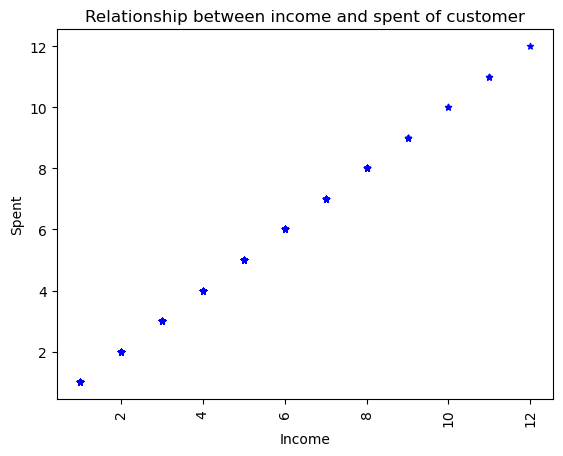

In [8]:
dfscatters=df2[['Income','Spent']]
plt.scatter(dfscatters['Income'], dfscatters['Spent'], color='black', s=20, marker='*')

plt.ylabel("Spent")
plt.xlabel("Income")
plt.title("Relationship between income and spent of customer")
plt.xticks(rotation=90)
plt.show()